## **Exploratory Data Analysis (EDA) Plots for ML Verification**

### Project Goal
Build a clear understanding of how to use different plots for **Exploratory Data Analysis (EDA)** and **ML model verification**.

---

### **Overview**
We will:
1. Apply the **C.E.L.L. Method** to common EDA and verification plots.
2. Use **Python** to generate each plot with simple datasets (Iris, Wine, Digits, and Synthetic data).
3. Explain the **interpretations**.

---

###**C.E.L.L. Method Legend**

| Symbol | Meaning |
|--------|---------|
| **C**  | **Conceptual Analogy** – A beginner-friendly metaphor or mental image for the plot. |
| **E**  | **Engineering Intuition** – What is technically happening under the hood. |
| **L**  | **Lifecycle Use Case** – Where in the data science/ML pipeline this plot is most useful. |
| **L**  | **Limitations** – Common mistakes or caveats when using the plot. |

---

## **Plots Covered**

1. Histogram  
2. Box Plot  
3. Scatter Plot  
4. Pair Plot (Seaborn)  
5. Line Plot  
6. Bar Plot  
7. Violin Plot  
8. KDE Plot  
9. Heatmap (Correlation Matrix)  
10. Swarm Plot  
11. Strip Plot  
12. Count Plot  
13. Area Plot  
14. ECDF Plot  
15. Confusion Matrix Plot  
16. ROC Curve  
17. Precision-Recall Curve  
18. Learning Curve  
19. Residual Plot  
20. Feature Importance Plot  

---

## **Example Dataset**
We will use:
- **Iris dataset** for basic `classification` visualizations.
- **Synthetic regression data** for `residuals & learning curves`.
- **Digits dataset** for `confusion matrix` and `ROC curve`.

---
##1. `Histogram`

C: Like counting how many students got each grade.

E: Shows data distribution by binning.

L: Explore distribution shape, detect skew.

L: Bin size choice changes interpretation.

##2. `Boxplot`

C: Like summarizing salaries into minimum, quartiles, and outliers.

E: Displays median, quartiles, spread, outliers.

L: Spot anomalies & skewness quickly.

L: Doesn’t show distribution details.

##3. `Violin Plot`

C: A boxplot with “distribution shape” visible.

E: Combines boxplot and KDE.

L: Compare distributions across groups.

L: Can be harder to read for beginners.

##4. `Scatter Plot`

C: Like plotting each person’s height vs weight.

E: Relationship between 2 variables.

L: Detect correlation, patterns, clusters.

L: Can be misleading with overplotting.

##5. `Pairplot`

C: Like checking all pairwise relationships at once.

E: Creates scatter plots for all variable pairs.

L: Explore correlations in small datasets.

L: Gets cluttered with many variables.

##6. `Correlation Heatmap`

C: A “friendship matrix” showing who’s closest to who.

E: Displays correlation coefficients.

L: Spot multicollinearity.

L: Correlation ≠ causation.

##7. `KDE Plot`

C: A smoothed histogram.

E: Shows estimated density of data.

L: Detect multimodal distributions.

L: Can oversmooth peaks.

##8.`Bar Plot`

C: Like counting how many times each category appears.

E: Shows categorical frequency.

L: Quick categorical comparison.

L: Not for continuous variables.

---

# **Model Verification Plots**

###1. `Confusion Matrix`

C: A scoreboard for correct vs wrong predictions.

E: Summarizes classification results.

L: See TP, FP, FN, TN counts.

L: Size not normalized can mislead.

###2.`ROC Curve`

C: Like testing a metal detector at different sensitivities.

E: Plots TPR vs FPR.

L: Evaluate binary classifiers.

L: Less useful for imbalanced data.

###4. `Precision-Recall Curve`

C: Like checking quality vs quantity in gold mining.

E: Plots precision vs recall.

L: Better for imbalanced data.

L: Doesn’t reflect TN count.

###5. `Learning Curve`

C: Like tracking student progress over weeks.

E: Plots accuracy vs training size.

L: Detect under/overfitting.

L: Needs multiple training runs.

###6. `Loss Curve`

C: Like tracking weight loss over time.

E: Shows training/validation loss.

L: Check convergence.

L: Spikes may be noise.

###7. `Feature Importance Plot`

C: Like ranking ingredients in a recipe by impact.

E: Shows most predictive features.

L: Model interpretability.

L: Different models rank differently.

###8. `Residual Plot`

C: Like measuring “how far off” your predictions are.

E: Shows prediction errors.

L: Check regression model fit.

L: Doesn’t work well for non-regression.

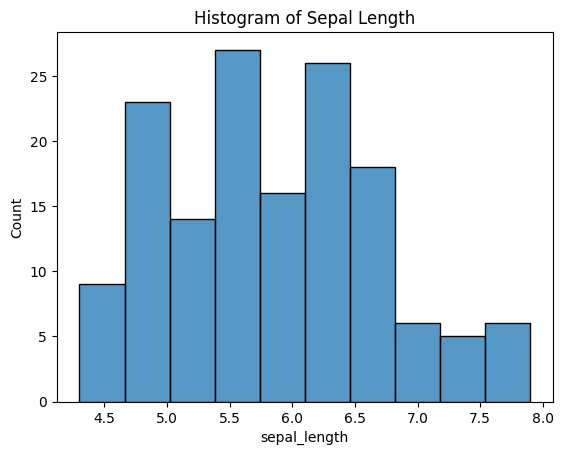

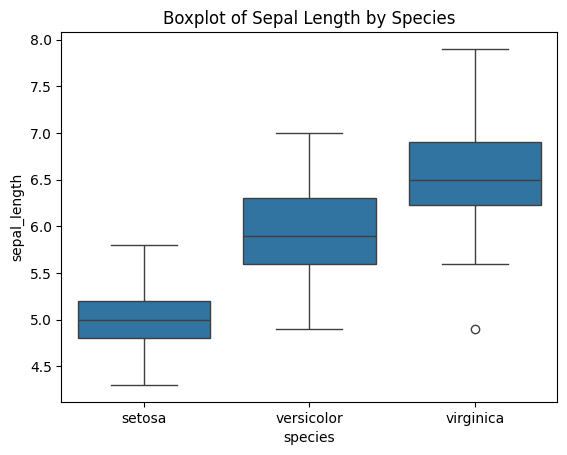

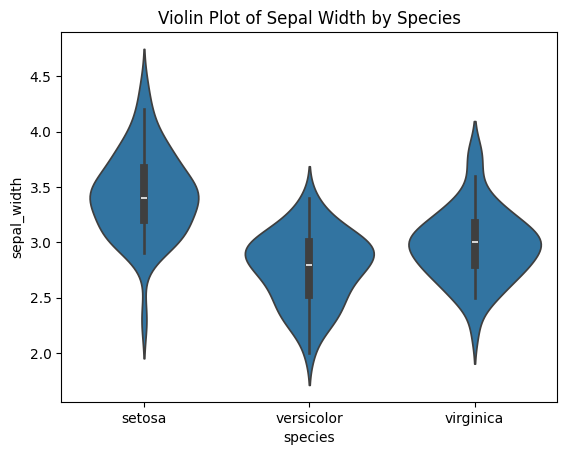

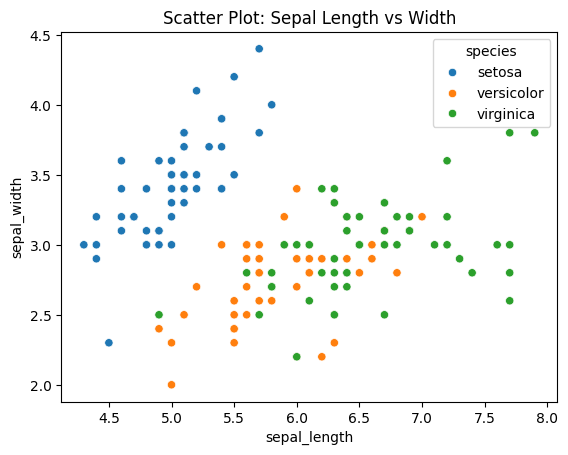

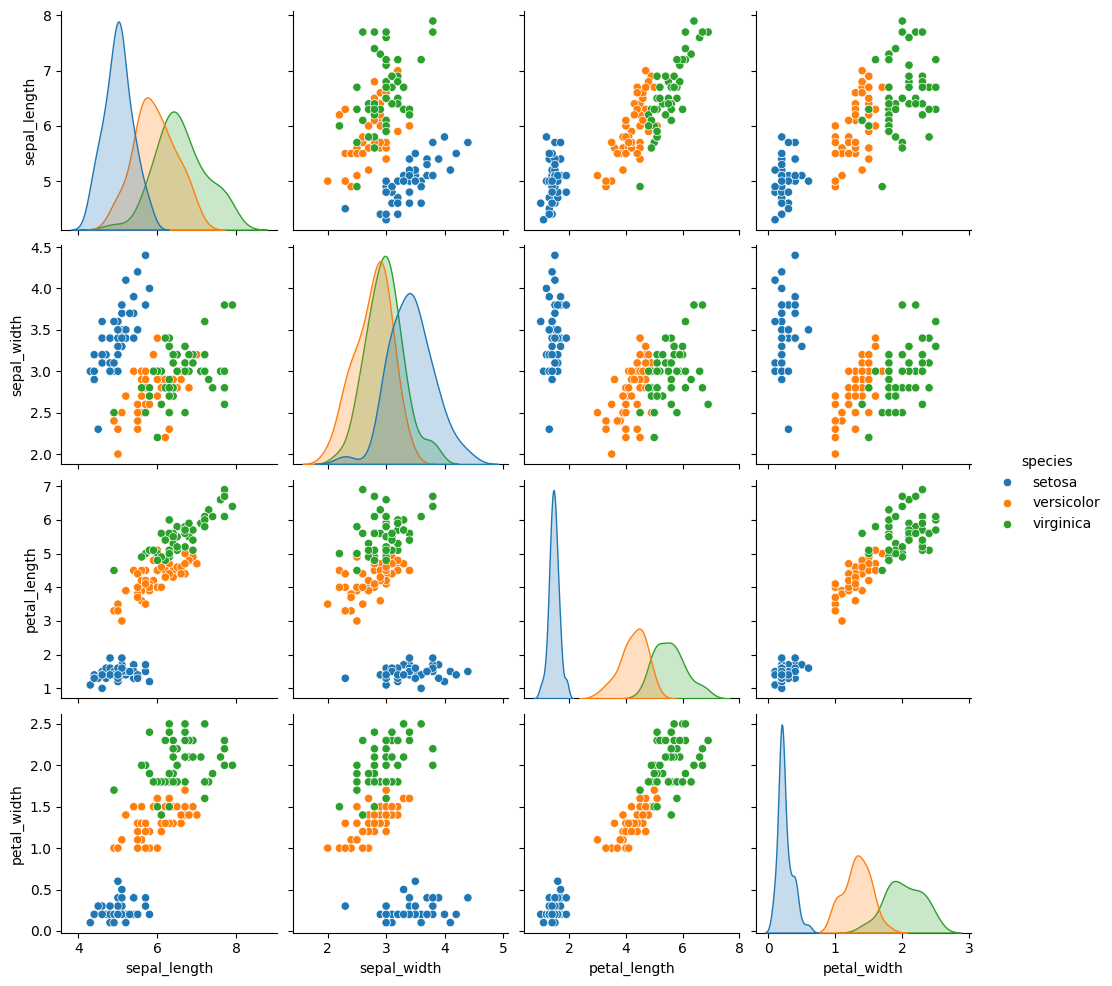

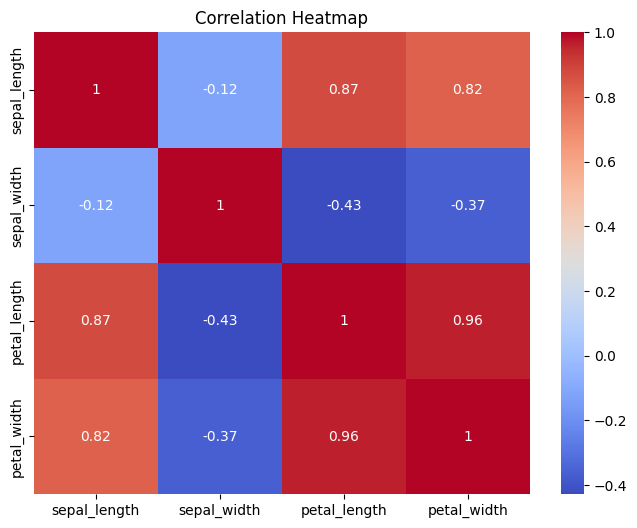

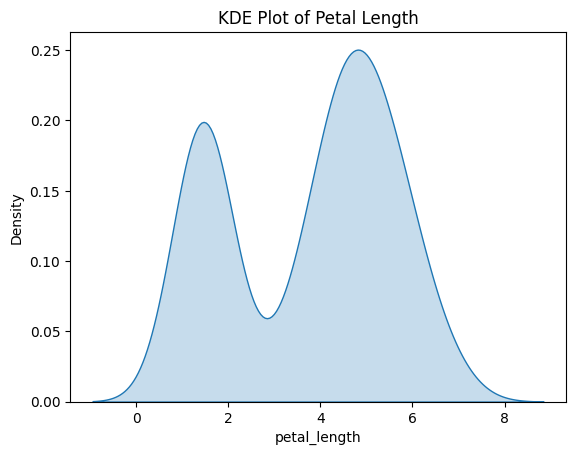

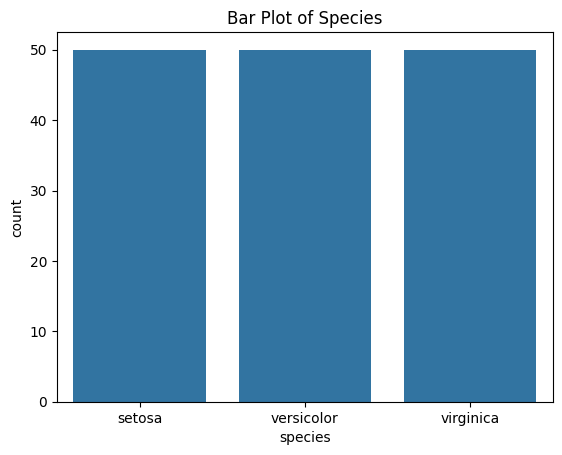

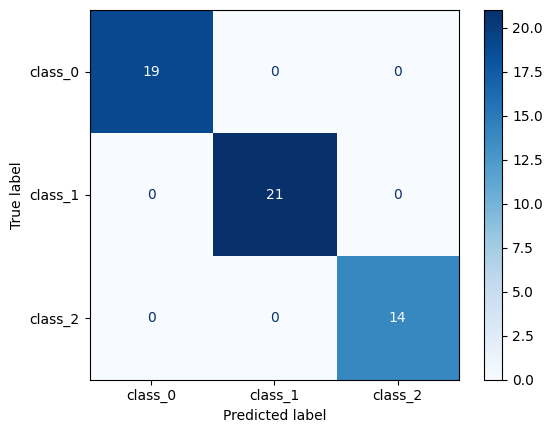

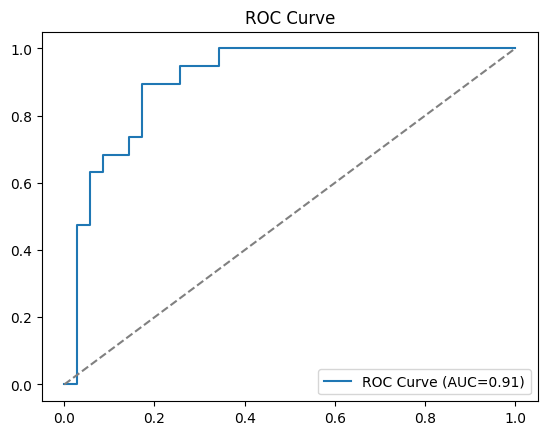

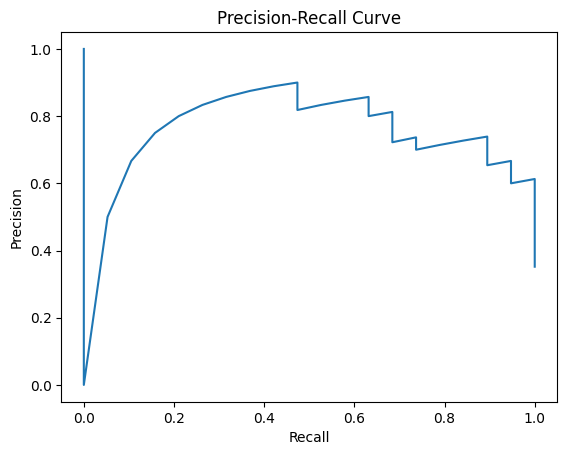

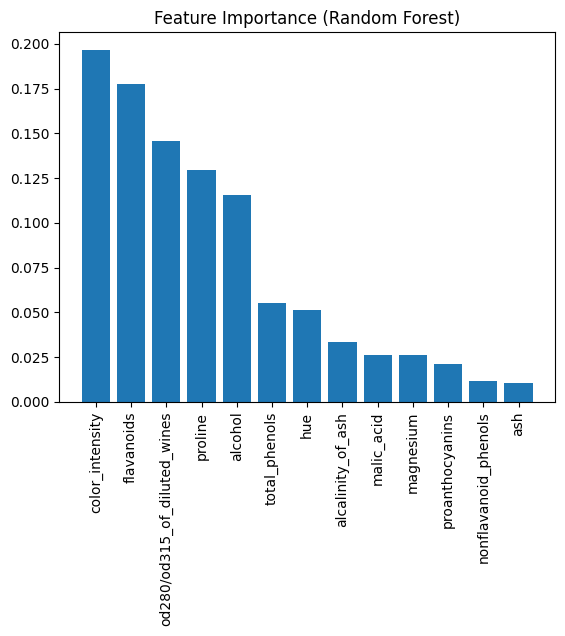

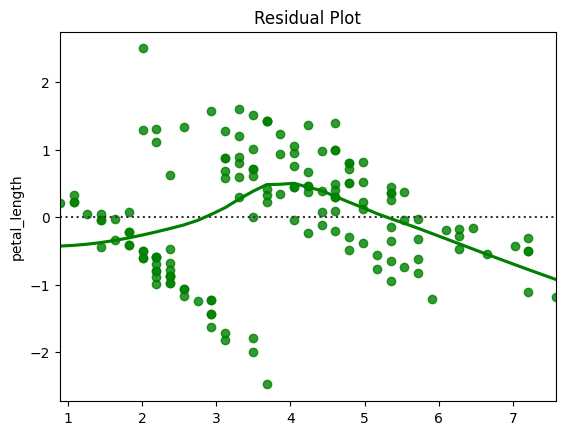

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Sample datasets
iris = sns.load_dataset("iris")
wine = load_wine()
digits = load_digits()

# 1. Histogram
sns.histplot(iris['sepal_length'], bins=10, kde=False)
plt.title("Histogram of Sepal Length")
plt.show()

# 2. Boxplot
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

# 3. Violin Plot
sns.violinplot(x='species', y='sepal_width', data=iris)
plt.title("Violin Plot of Sepal Width by Species")
plt.show()

# 4. Scatter Plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title("Scatter Plot: Sepal Length vs Width")
plt.show()

# 5. Pairplot
sns.pairplot(iris, hue='species')
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 7. KDE Plot
sns.kdeplot(iris['petal_length'], fill=True)
plt.title("KDE Plot of Petal Length")
plt.show()

# 8. Bar Plot
sns.countplot(x='species', data=iris)
plt.title("Bar Plot of Species")
plt.show()

# Model training for verification plots
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Binary classification example for ROC/PR
X_bin = wine.data[:, :2]
y_bin = (wine.target == 0).astype(int)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)
model_bin = LogisticRegression()
model_bin.fit(X_train_bin, y_train_bin)
y_score = model_bin.predict_proba(X_test_bin)[:, 1]

# 10. ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("ROC Curve")
plt.legend()
plt.show()

# 11. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bin, y_score)
plt.plot(recall, precision, label="PR Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# 12. Feature Importance Plot
importances = clf.feature_importances_
feat_names = wine.feature_names
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feat_names)[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()

# 13. Residual Plot (Regression example)
from sklearn.linear_model import LinearRegression
X_reg = iris[['sepal_length']]
y_reg = iris['petal_length']
reg = LinearRegression().fit(X_reg, y_reg)
y_pred_reg = reg.predict(X_reg)
residuals = y_reg - y_pred_reg
sns.residplot(x=y_pred_reg, y=residuals, lowess=True, color="g")
plt.title("Residual Plot")
plt.show()
